In [1]:
# define relevants paths and load functions and libraries

%run Bianchini2025_SC\\Analysis\\helper_functions\\functions_analysis.py
    
data_path = 'Bianchini2025_SC\\Datasets\\' # your data path
saving_path = 'Bianchini2025_SC\\Figures_output\\' # your saving figures path


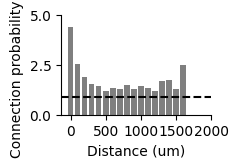

In [3]:
# Plot connection percentage as a function of distance - Fig 3A

load_dir = ''.join([data_path,'connectivity_dataset\\conn_perc_distance.npy'])
perc_pairs = np.load(load_dir)

fig,this_ax = plt.subplots(1,1,figsize=(1.5,1))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

bars = this_ax.bar(np.arange(len(perc_pairs)), perc_pairs, color='k',alpha = 0.5)

# add labels
this_ax.set_xlabel('Distance (um)',fontsize=10)
this_ax.set_ylabel('Connection probability (%)',fontsize=10)

max_val2 = len(perc_pairs)
this_ax.set_xticks([0,5,10,15,20])
this_ax.set_xticklabels([0,500,1000,1500,2000],fontsize=10)
max_perc = np.round(np.nanmax(perc_pairs))+1
this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)
this_ax.set_ylim([0,max_perc])
this_ax.set_yticks([0,max_perc/2,max_perc])

load_dir = ''.join([data_path,'connectivity_dataset\\random_connection_probability.npy'])
random_connection_probability = np.load(load_dir)

this_ax.axhline(y=random_connection_probability, color='k', linestyle='--', linewidth=1.5)

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure3A.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


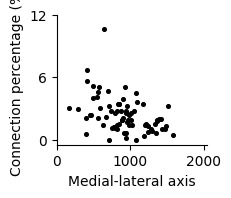

In [4]:
# Plot connection percentage as a function of location along ML axis - Fig 3B

load_dir = ''.join([data_path,'connectivity_dataset\\conn_perc_ML.npz'])
data = np.load(load_dir)

all_ML = data['all_ML']
all_perc_conn = data['all_perc_conn']
actual_lengthML = data['actual_lengthML']

fig, ax = plt.subplots(1,1,figsize=(1.5,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

ax.scatter(all_ML,all_perc_conn,7,c = 'k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.set_xlim([0, actual_lengthML])
ax.set_ylim([-0.5, 12])
ax.set_yticks([0, 6, 12])
ax.set_ylabel('Connection percentage (%)', fontsize=10)
ax.set_xlabel('Medial-lateral axis', fontsize=10)

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure3B.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


KS Test: statistic=0.2866, p-value=1.3535e-10


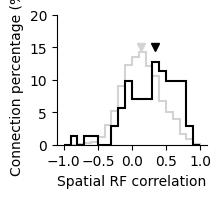

In [8]:
# Plot distribution of RF correlation for conencted and not conencted pairs 

# Load the data
load_dir = ''.join([data_path,'connectivity_dataset\\RF_correlation_connected_vs_notconnected.csv'])
df = pd.read_csv(load_dir)

# Separate by significance
all_sig_corrs = df[df["significance"] == "significant"]["correlation"].values
all_non_sig_corrs = df[df["significance"] == "non-significant"]["correlation"].values

# Calculate medians
median_sig = np.median(all_sig_corrs)
median_non_sig = np.median(all_non_sig_corrs)

# Plot
fig, ax = plt.subplots(1,1,figsize=(1.5,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

bins = np.arange(-1, 1.1, 0.1)

# Histograms
ax.hist(all_non_sig_corrs, bins=bins, density=False,
        weights=np.ones_like(all_non_sig_corrs)*100/len(all_non_sig_corrs),
        histtype='step', color='lightgray', linewidth=1.5)

ax.hist(all_sig_corrs, bins=bins, density=False,
        weights=np.ones_like(all_sig_corrs)*100/len(all_sig_corrs),
        histtype='step', color='k', linewidth=1.5)

# Plot median triangles
triangle_y = 15  # adjust based on ax.set_ylim

ax.plot(median_non_sig, triangle_y, marker='v', color='lightgray', markersize=6, label='Median (non-sig)')
ax.plot(median_sig, triangle_y, marker='v', color='black', markersize=6, label='Median (sig)')

# Aesthetics
ax.set_xlabel('Spatial RF correlation')
ax.set_ylabel('Connection percentage (%)')
ax.set_ylim([0, 20])
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ks_stat, ks_p = stats.ks_2samp(all_sig_corrs, all_non_sig_corrs)
print(f"KS Test: statistic={ks_stat:.4f}, p-value={ks_p:.4e}")

dir = ''.join([saving_path,'Figure3C.svg'])
fig.savefig(dir, dpi=300, format='svg', bbox_inches='tight', pad_inches=0)


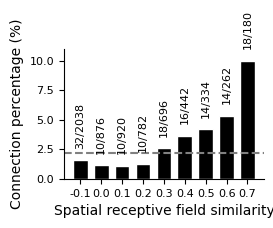

In [12]:
# Plot connection percentage as a function of RF correlation

data = np.load(data_path + 'connectivity_dataset/RF_correlation_as_function_connectivity.npz')
n_pairs_connected = data['n_pairs_connected'].item()
n_pairs_total = data['n_pairs_total'].item()
conn_prob_obs  = data['conn_prob_obs']   # shape: (n_bins,)
conn_prob_null = data['conn_prob_null']  # shape: (n_bootstraps, n_bins)
n_total        = data['n_total']         # shape: (n_bins,)
n_connected    = data['n_connected']     # shape: (n_bins,)
bins = data['bins']

bin_centers = (bins[:-1] + bins[1:]) / 2
bar_width = 0.07
offset = bar_width / 2

fig, ax = plt.subplots(1,1,figsize=(2,1.3))

plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

conn_prob_null_mean = np.nanmean(conn_prob_null, axis=0)
conn_prob_null_sem = np.nanstd(conn_prob_null, axis=0) / np.sqrt(np.sum(~np.isnan(conn_prob_null), axis=0))
conn_prob_null_iqr = (np.nanpercentile(conn_prob_null, 75, axis=0) - 
                      np.nanpercentile(conn_prob_null, 25, axis=0)) / 2

# Plot mean as a line
#ax.plot(bin_centers, conn_prob_null_mean, color='gray', label='Randomised mean')
mean_conn_prob = (n_pairs_connected /n_pairs_total) * 100
ax.axhline(y=mean_conn_prob, linestyle='--', color='grey', label='Mean connection rate')

# Plot observed connection probabilities as bars
bars = ax.bar(bin_centers, conn_prob_obs, width=bar_width, color='black',
              edgecolor='white', label='Observed', zorder=1)

lower_bound = conn_prob_null_mean - conn_prob_null_iqr
upper_bound = conn_prob_null_mean + conn_prob_null_iqr

# Plot shaded IQR area
#ax.fill_between(bin_centers, lower_bound, upper_bound, color='gray', alpha=0.5, label='IQR')


# Add text labels and significance stars
for i, bar in enumerate(bars):
    if n_total[i] > 0:
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 1,
                f"{n_connected[i]}/{n_total[i]}",
                ha='center', va='bottom', fontsize=8, rotation=90)


# Plot aesthetics
ax.set_xticks(bin_centers)
ax.set_xticklabels([f"{b:.1f}" for b in bins[:-1]])
ax.set_xlabel("Spatial receptive field similarity")
ax.set_ylabel("Connection percentage (%)")
ax.set_ylim(0, max(np.nanmax(conn_prob_obs), np.nanmax(conn_prob_null_mean)) + 1)
#ax.set_ylim([0,5])
#ax.set_yticks([0,5,10,15,20])
ax.tick_params(axis='y', labelsize=8)

ax.tick_params(axis='x', labelsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

dir = ''.join([saving_path,'Figure3D.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

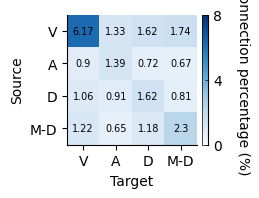

In [21]:
# Plot connectivity matrix - Fig 3E

load_dir = ''.join([data_path,'connectivity_dataset\\connectivity_matrix.npy'])
perc_conn = np.load(load_dir)

fig, ax = plt.subplots(1,1,figsize=(1.5,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5) 

n_modalities = 4
ax.set_xticks(np.arange(int(n_modalities)))
ax.set_xticklabels(['V','A','D','M-D'],fontsize = 10)
       
ax.set_yticks(np.arange(int(n_modalities)))
ax.set_yticklabels(['V','A','D','M-D'],fontsize = 10)

ax.set_xlabel('Target',fontsize=10)
ax.set_ylabel('Source',fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

val_max = 8#
val = np.round(np.nanmax(perc_conn[:,:]))
img = ax.imshow(perc_conn[:,:], cmap='Blues', interpolation='nearest',vmin=0,vmax= val_max)
           
curr_scores = np.round(perc_conn[:,:],2)
for i in range(curr_scores.shape[0]):
    for j in range(curr_scores.shape[1]):
        if not np.isnan(curr_scores[i, j]):
            ax.text(j, i, f'{curr_scores[i, j]}', ha='center', va='center', fontsize=7)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(img,cax=cax)
cbar.set_label('Connection percentage (%)',rotation=-90,labelpad=20,fontsize=10)
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.ax.tick_params(width=0.5, length=2, direction='in', which='both',labelsize=10)
cbar.outline.set_linewidth(0.5)
cbar.set_ticks([0, 4,8])

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure3E.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)



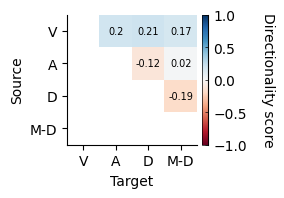

In [22]:
# Plot connectivity matrix - Fig 3F

load_dir = ''.join([data_path,'connectivity_dataset\\directionality_score_matrix.npy'])
dir_score = np.load(load_dir)

n_modalities = 4
fig, ax = plt.subplots(1,1,figsize=(1.5,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5) 
print_real_n = 0

ax.set_xticks(np.arange(int(n_modalities)))
ax.set_xticklabels(['V','A','D','M-D'],fontsize = 10)
       
ax.set_yticks(np.arange(int(n_modalities)))
ax.set_yticklabels(['V','A','D','M-D'],fontsize = 10)

ax.set_xlabel('Target',fontsize=10)
ax.set_ylabel('Source',fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
val_max = 8
val = np.round(np.nanmax(dir_score[:,:]))
img = ax.imshow(dir_score[:,:], 'RdBu', interpolation='nearest',vmin= -1, vmax = 1)
         
curr_scores = np.round(dir_score[:,:],2)
for i in range(curr_scores.shape[0]):
    for j in range(curr_scores.shape[1]):
        if not np.isnan(curr_scores[i, j]):
            ax.text(j, i, f'{curr_scores[i, j]}', ha='center', va='center', fontsize=7)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(img,cax=cax)
cbar.set_label('Directionality score',rotation=-90,labelpad=20,fontsize=10)
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.ax.tick_params(width=0.5, length=2, direction='in', which='both',labelsize=10)
cbar.outline.set_linewidth(0.5)

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure3F.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


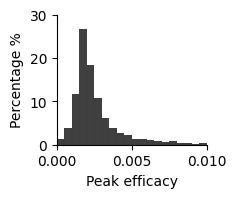

In [23]:
# Plot distribution of peak efficacy - Fig 3G

load_dir = ''.join([data_path,'connectivity_dataset\\conn_strenght_dist.npy'])
connection_strength = np.load(load_dir)

fig, ax = plt.subplots(1,1,figsize=(1.5,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
max_val = np.max(connection_strength)
bins = np.arange(0,max_val,0.0005)
sns.histplot(connection_strength,stat='percent',color='k',bins = bins)
plt.xlabel('Peak efficacy')
plt.ylabel('Percentage %')
ax.set_ylim([0,30])
ax.set_xlim([0,0.01])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure3G.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


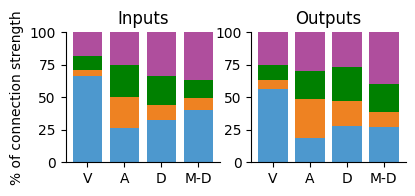

In [24]:
# Percentage of the total summed efficacy for inputs and outputs - Fig 3I

colors = ['#4D98CE', '#EE8222','Green' ,'#AF4E9D']

load_dir = ''.join([data_path,'connectivity_dataset\\conn_strength_IN_OUT.npz'])
data = np.load(load_dir)
results_strength_input = data['results_strength_input']
results_strength_output = data['results_strength_output']

fig, ax = plt.subplots(1, 2, figsize=(4, 2))  # Adjust figure size for clarity
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.2, top=0.85)

# Plot Inputs
A = np.copy(results_strength_input)
for i in range(A.shape[0]):
    bottom = np.sum(A[:i, :], axis=0) if i > 0 else None
    ax[0].bar(np.arange(A.shape[1]), A[i, :], bottom=bottom, color=colors[i])

ax[0].set_xticks(np.arange(A.shape[1]))
ax[0].set_xticklabels(['V','A', 'D', 'M-D'])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_ylabel('% of connection strength')
ax[0].set_title('Inputs')
ax[0].set_ylim([0, 100])

# Plot Outputs
A = np.copy(results_strength_output)
for i in range(A.shape[0]):
    bottom = np.sum(A[:i, :], axis=0) if i > 0 else None
    ax[1].bar(np.arange(A.shape[1]), A[i, :], bottom=bottom, color=colors[i])

ax[1].set_xticks(np.arange(A.shape[1]))
ax[1].set_xticklabels(['V', 'A', 'D', 'M-D'])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title('Outputs')
ax[1].set_ylim([0, 100])

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure3H.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


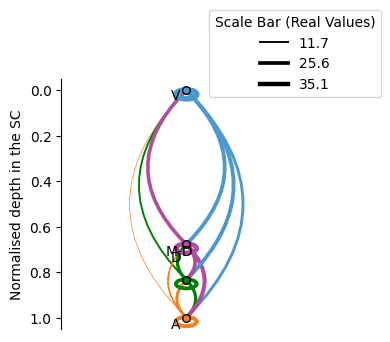

In [20]:
# Schematic representation of functional connectivity observed in the DV axes of the SC - Fig 3G

diff_strength = results_strength_output

load_dir = ''.join([data_path,'connectivity_dataset\\mean_loc_subgroups.npy'])
depth = np.load(load_dir)
    
fig, ax = plt.subplots(1,1,figsize=(2.5,2.5))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5) 

regions = ['V','A','D','M-D']
regions_cmap = colors

mean_depth_array = np.array(depth)
min_value = np.min(mean_depth_array)
max_value = np.max(mean_depth_array)
normalized_depth = (mean_depth_array - min_value) / (max_value - min_value)

regions_pos = [(0.5, normalized_depth[i]) for i in range(len(regions))]
regions_text_pos_x = [0.4925, 0.4925, 0.4925, 0.49, 0.49, 0.49]
regions_text_pos_y = [0.04, 0.05, -0.08, 0.05, -0.08, -0.08]

proj_matrix_org = diff_strength.T
log_proj_matrix = np.log1p(diff_strength.T)
min_log = log_proj_matrix.min()
max_log = log_proj_matrix.max()

# Scale to visible thickness range
min_width = 0.5
max_width = 4.0
proj_matrix = min_width + (log_proj_matrix - min_log) * (max_width - min_width) / (max_log - min_log)
#proj_matrix = min_width + ((log_proj_matrix - min_log) / (max_log - min_log))**1.5 * (max_width - min_width)

val = 1#2

width=0.005
height=0.035
for i, (region, region_pos) in enumerate(zip(regions, regions_pos)):
    circle = mpl.patches.Ellipse((region_pos[0], region_pos[1] + height/2), width=0.01, height=0.04, color=regions_cmap[i], 
                                        lw=val *proj_matrix[i, i], fill=False)
    ax.add_artist(circle)
    
for i, region in enumerate(regions):
    ax.text(regions_text_pos_x[i], normalized_depth[i] + regions_text_pos_y[i], region, size=10)
    
for i, from_region_idx in enumerate(np.arange(len(normalized_depth))):
    for j, to_region_idx in enumerate(np.arange(len(normalized_depth))):
        if i < j:
            ax.annotate("", xy=(regions_pos[j][0], regions_pos[j][1]), xycoords='data',
                        xytext=(regions_pos[i][0], regions_pos[i][1]), textcoords='data',
                        arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=+0.5",
                                        color=regions_cmap[j],
                                        lw=val * proj_matrix[from_region_idx, to_region_idx]), zorder=-1)
        else:
            ax.annotate("", xy=(regions_pos[i][0], regions_pos[i][1]), xycoords='data',
            xytext=(regions_pos[j][0], regions_pos[j][1]), textcoords='data',
            arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=-0.5",
                            color=regions_cmap[j],
                            lw=val * proj_matrix[from_region_idx, to_region_idx]), zorder=-1)
            
for i, (region, region_pos) in enumerate(zip(regions, regions_pos)): 
    ax.scatter(region_pos[0], region_pos[1], s=30, marker='o', color=regions_cmap[i], edgecolor='black', zorder=1)

    
ax.set_xlim([0.44, 0.56])
ax.grid(False)
ax.set_xticks([])
ax.tick_params(axis='y', which='major', labelsize=10)
ax.set_ylabel('Normalised depth in the SC', fontsize=10)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.invert_yaxis()

# Percentiles of the original values (before log or scaling)
real_values = np.percentile(proj_matrix_org, [10, 50, 90])  # 3 representative real values

# Apply same transformation: log1p, then scale to min/max line width
log_values = np.log1p(real_values)
scaled_widths = min_width + (log_values - min_log) * (max_width - min_width) / (max_log - min_log)
# Now, create legend lines using the correctly scaled widths
scale_lines = [
    mpl.lines.Line2D([0], [0], color='k', lw=val * width, label=f'{real_val:.1f}')
    for width, real_val in zip(scaled_widths, real_values)
]

# Add scale bar as a legend to the plot
ax.legend(handles=scale_lines, title="Scale Bar (Real Values)", loc='upper right', borderaxespad=-5.0)

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure3I.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)